## Titanic Dataset

In this project, I have analyzed the famous Titanic dataset to predict the survival of passengers based on various factors. I have explored the dataset, preprocessed the data, and applied machine learning models to achieve an accurate prediction.

## Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing Dataset

In [7]:
titanic = pd.read_csv('/Users/pushpita/Downloads/Titanic.csv')

In [9]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The **Titanic dataset** contains both **categorical** and **numerical** data, which represent different types of information about passengers:

### **Categorical Data**:
These are variables that represent distinct categories or groups:
1. **Sex**: Male, Female
2. **Embarked**: C (Cherbourg), Q (Queenstown), S (Southampton)
3. **Pclass**: 1, 2, 3 (Passenger class)
4. **Survived**: 0 (Did not survive), 1 (Survived)

### **Numerical Data**:
These variables represent measurable quantities:
1. **Age**: Age of the passengers onboard.
2. **Fare**: Ticket price of the passsengers.
3. **SibSp**: Numerical values representing the number of siblings/spouses aboard.
4. **Parch**: Numerical values representing the number of parents/children aboard.

In summary, the Titanic dataset combines categorical features for classifying groups and numerical features for performing calculations and quantitative analysis.

In [12]:
# Getting a summary of the dataset
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
# Getting descriptive statisitcs
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Exploratory Data Analysis

## Missing Data

<Axes: >

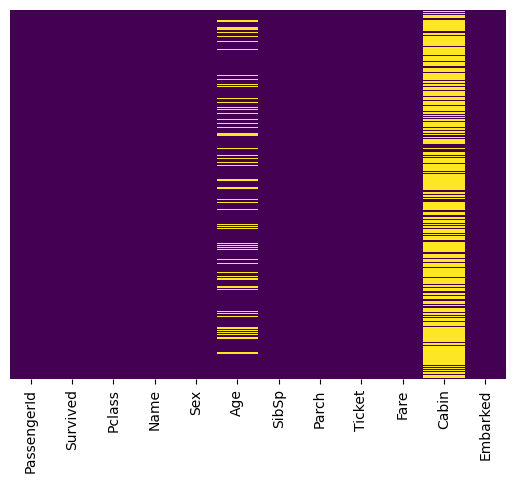

In [20]:
# Check for missing data in each column using Heatmap
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Roughly a small percent of the Age data is missing in the Titanic dataset. The missing proportion is small enough to reasonably replace the values using an imputation method.

<Axes: xlabel='Survived', ylabel='count'>

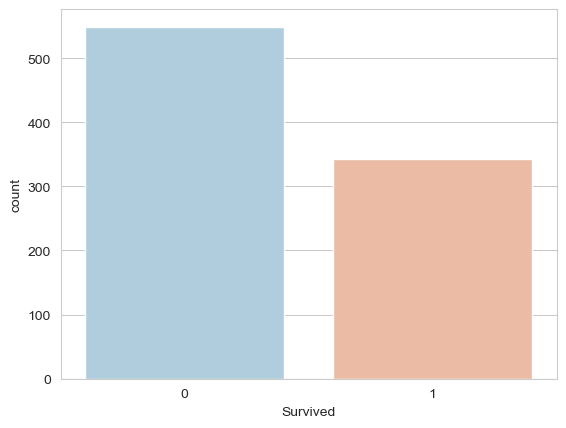

In [23]:
# Assigning 'Survived' to both x and hue for distinct coloring.
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Survived', data=titanic, palette='RdBu_r', legend=False)

<Axes: xlabel='Survived', ylabel='count'>

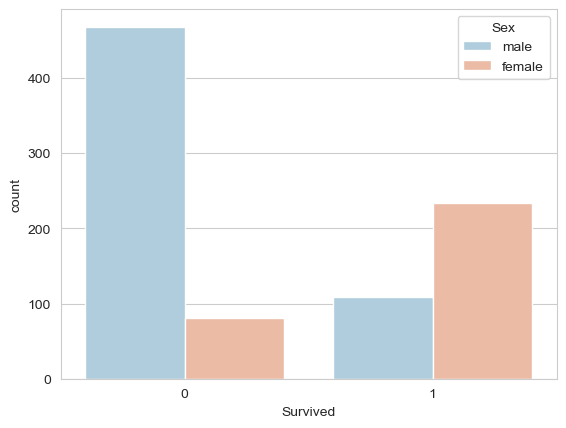

In [25]:
# Visualizing the relationship between survival and gender.
# The countplot shows the number of passengers who survived or did not survive, categorized by gender (Male/Female).
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=titanic, palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

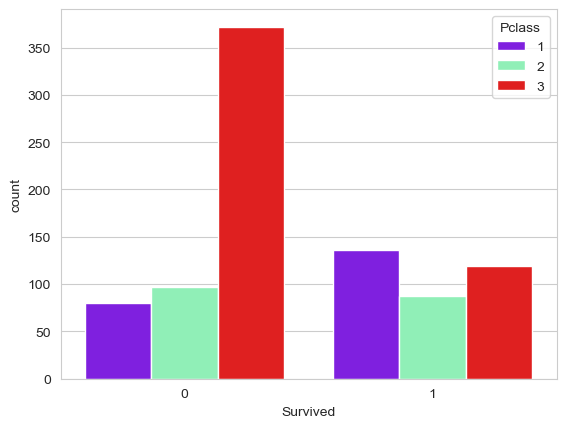

In [27]:
# Visualizing the relationship between survival and passenger class.
# The countplot displays the number of survivors and non-survivors, categorized by passenger class (Pclass).
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=titanic, palette='rainbow')

<Axes: xlabel='Age', ylabel='Count'>

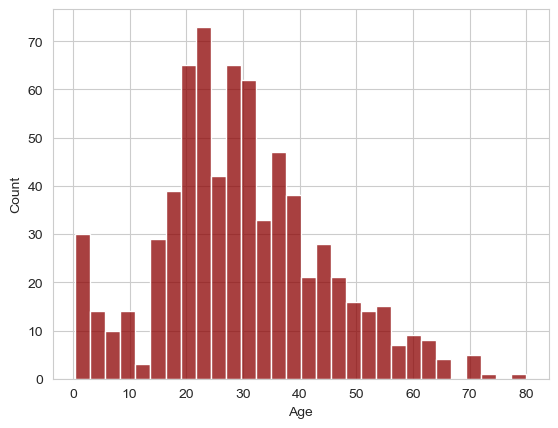

In [29]:
# Plotting the distribution of passenger ages.
# The histplot shows the age distribution of passengers, excluding missing values. 
sns.histplot(titanic['Age'].dropna(), kde=False, color='darkred', bins=30)

Text(0.5, 1.0, 'Count of Passengers by Number of Siblings/Spouses Aboard')

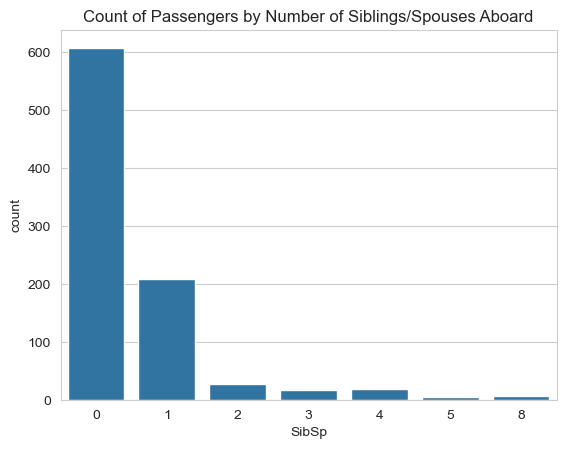

In [31]:
# Plotting the count of passengers with different numbers of siblings/spouses aboard
sns.countplot(x='SibSp', data=titanic)
plt.title('Count of Passengers by Number of Siblings/Spouses Aboard')

Text(0.5, 0, 'Fare')

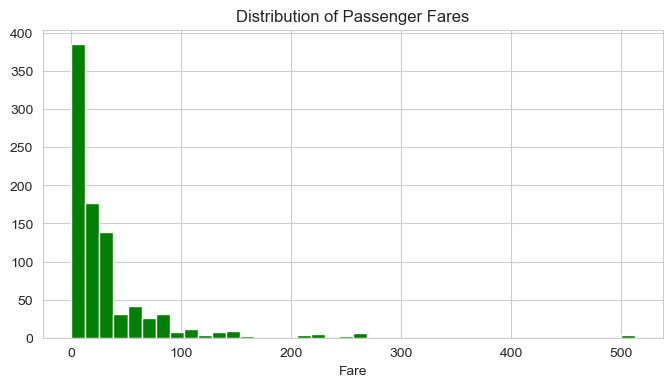

In [33]:
# Plotting the histogram of passenger fares
titanic['Fare'].hist(color='green', bins=40, figsize=(8,4))
plt.title('Distribution of Passenger Fares')
plt.xlabel('Fare')

## Data Cleaning

Now, to handle missing values in the `Age` column, I will calculate the average age for each passenger class and use these median age values to fill in the missing data. This approach will ensure that imputation is consistent with the age distribution within each class.

Text(0.5, 1.0, 'Age Distribution by Passenger Class')

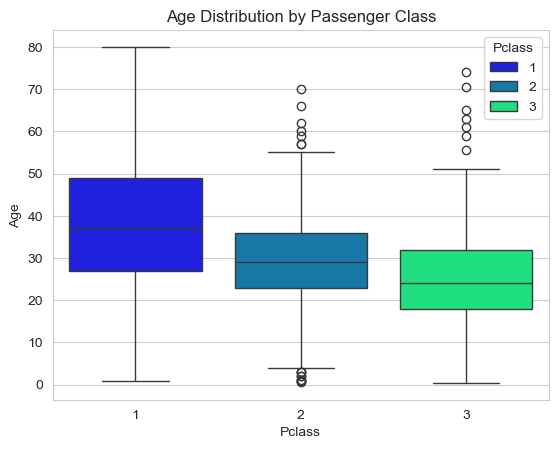

In [37]:
# Created a boxplot to visualize the distribution of ages across different passenger classes
sns.boxplot(x='Pclass', y='Age', data=titanic, hue='Pclass', palette='winter', dodge=False)
plt.title('Age Distribution by Passenger Class')

We can see the passengers in the higher classes tend to be older. I will use these median age values to impute based on Pclass for Age.

In [40]:
# Define the impute_age function
def impute_age(cols):
    # Extract Age and Pclass values from the input using .iloc for positional indexing
    Age = cols.iloc[0]
    Pclass = cols.iloc[1]
    
    # Check if Age is missing
    if pd.isnull(Age):
        # Return the imputed age based on passenger class
        if Pclass == 1:
            return 37  # Imputed average age for class 1
        elif Pclass == 2:
            return 29  # Imputed average age for class 2
        else:
            return 24  # Imputed average age for class 3
    else:
        # If Age is not missing, return the original Age value
        return Age

In [42]:
# Apply the function to the DataFrame
titanic['Age'] = titanic[['Age', 'Pclass']].apply(impute_age, axis=1)

<Axes: >

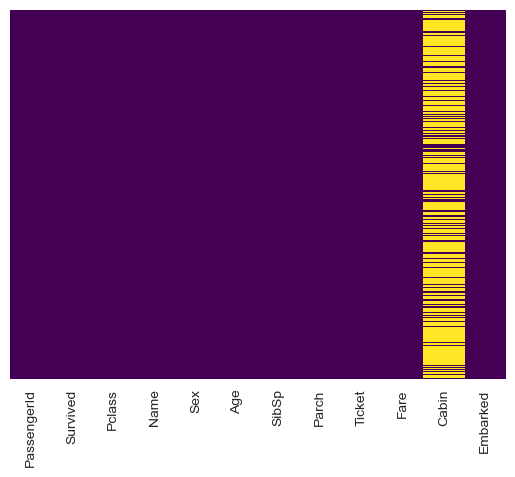

In [44]:
#Plotting heatmap to checnk for missing values again
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Now, I will drop the Cabin column and the row in Embarked that is NaN.

In [47]:
titanic.drop('Cabin',axis=1,inplace=True)

In [49]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [51]:
titanic.dropna(inplace=True)

## Converting Categorical Features 

Next, I will convert categorical features to dummy variables.

In [56]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [58]:
# Encoded the 'Sex' column from the train DataFrame
# Convert categorical values ('male', 'female') into binary columns
# Drop the first category ('female') to avoid multicollinearity
sex = pd.get_dummies(titanic['Sex'], drop_first=True)

# Convert Boolean values to integers (1 and 0)
sex = sex.astype(int)

# Encoded the 'Embarked' column from the train DataFrame
# Convert categorical values ('C', 'Q', 'S') into binary columns
# Drop the first category ('C') to avoid multicollinearity
embark = pd.get_dummies(titanic['Embarked'], drop_first=True)

# Convert Boolean values to integers (1 and 0)
embark = embark.astype(int)

In [62]:
titanic.drop(['Sex','Embarked','Name','Ticket'],axis=1, inplace=True)

In [64]:
titanic = pd.concat([titanic,sex,embark],axis=1)

In [66]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


## Logistic Regression Model

In [69]:
# Import train_test_split to split the dataset into training and testing sets for model evaluation
from sklearn.model_selection import train_test_split

In [71]:
# Split the 'train' DataFrame into features (X) and target (y)
# X: All columns except 'Survived' (the feature set)
# y: The 'Survived' column (the target variable)
X_train, X_test, y_train, y_test = train_test_split(titanic.drop('Survived', axis=1),titanic['Survived'],test_size=0.30,random_state=101)

In [73]:
# Import LogisticRegression for building a logistic regression model to predict ad clicks
from sklearn.linear_model import LogisticRegression

In [77]:
# Initialize the Logistic Regression model
# Fit the model on the training data
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

## Training & Predicting

In [79]:
predictions = logmodel.predict(X_test)

In [82]:
# Import classification_report to evaluate the performance of the classification model
from sklearn.metrics import classification_report, confusion_matrix

In [84]:
# Print the classification report to evaluate model performance on the test set
# This report includes precision, recall, F1-score, and support for each class
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       163
           1       0.84      0.68      0.75       104

    accuracy                           0.82       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.82      0.82       267

[[149  14]
 [ 33  71]]


## Conclusion

1. **Overall Model Performance**:
   - The logistic regression model has an **accuracy of 82%**, which means that 82% of the predictions made by the model are correct.
   - The **weighted average precision, recall, and F1-score** are all approximately **0.82**, indicating that the model performs consistently across both classes (survived and not survived).

2. **Class 0 (Not Survived)**:
   - **Precision**: 0.82 - When the model predicts a passenger did not survive (class 0), it is correct 82% of the time.
   - **Recall**: 0.91 - The model identifies 91% of the actual passengers who did not survive.
   - **F1-score**: 0.86 - The F1-score, which balances precision and recall, is relatively high, indicating a strong performance in predicting non-survivors.

3. **Class 1 (Survived)**:
   - **Precision**: 0.84 - When the model predicts a passenger survived (class 1), it is correct 84% of the time.
   - **Recall**: 0.68 - The model correctly identifies 68% of the actual survivors.
   - **F1-score**: 0.75 - The F1-score is lower than for class 0, suggesting that the model struggles more with identifying survivors than non-survivors.

4. **Confusion Matrix**:
   - The confusion matrix shows that the model correctly predicted 149 passengers who did not survive (True Negatives) and 71 who survived (True Positives).
   - There were **14 False Positives** (incorrectly predicted as survivors) and **33 False Negatives** (survivors incorrectly predicted as non-survivors).
   
### Key Insights:
- The model performs better at predicting passengers who did not survive compared to those who survived, as seen from the higher recall for class 0 (not survived).
- The model's recall for survivors is lower, meaning it misses some actual survivors.